In [1]:
import glob
import os
import re

import matplotlib as mpl
import matplotlib.pyplot as plt
# import mpld3 
import seaborn as sns
import palettable.colorbrewer.diverging as pld
# import palettable.lightbartlein.diverging as pld

import numpy as np
import pandas as pd
# from sklearn import preprocessing

from scipy import integrate
# import scipy.signal as scipy
from scipy.optimize import curve_fit
# from scipy.signal import find_peaks

%matplotlib widget

In [2]:
plt.close('all')

In [3]:
## Plotting parameters

palette = pld.RdYlGn_4_r
# palette = pld.BlueGreen_4_r
# palette = pld.Spectral_10_r
cmap = palette.mpl_colormap
# cmap = plt.get_cmap('rainbow')
transparency = 0.7
labelsize = 20
spinewidth = 3
fontsize = 26
legendsize = 20
fontweight = 'bold'
labelpad = 6
pad = 10
linewidth = 2.5


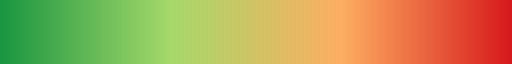

In [4]:
cmap

# Reading Uv-Vis data in .csv

## Find the subfolders in the current working folder (cwd)

In [5]:
#cwd = os.getcwd()
# cwd = '/nsls2/users/clin1/Documents/Cheng-Hung/temp/20221108_insitu'
cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/UVVIS_OceanView/20230913_sapphire_OAdilute'
subfolder = glob.glob(cwd + '/**Cs_100**')
subfolder.sort()
# # del subfolder[-1]
print(*subfolder, sep = '\n')  ## Print one element per line

/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/UVVIS_OceanView/20230913_sapphire_OAdilute/Cs_100_Br_100_Tol_000
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/UVVIS_OceanView/20230913_sapphire_OAdilute/Cs_100_Br_100_Tol_050
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/UVVIS_OceanView/20230913_sapphire_OAdilute/Cs_100_Br_100_Tol_100
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/UVVIS_OceanView/20230913_sapphire_OAdilute/Cs_100_Br_100_Tol_200
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/UVVIS_OceanView/20230913_sapphire_OAdilute/Cs_100_Br_100_Tol_600


In [6]:
dilute_list = [os.path.basename(i) for i in subfolder]
dilute_list
# np.float32(re.findall(r'\d+', dilute_list[0]))

['Cs_100_Br_100_Tol_000',
 'Cs_100_Br_100_Tol_050',
 'Cs_100_Br_100_Tol_100',
 'Cs_100_Br_100_Tol_200',
 'Cs_100_Br_100_Tol_600']

In [7]:
dilute_ratio = []
for i in range(len(dilute_list)):
    rates = np.float32(re.findall(r'\d+', dilute_list[i]))
    c = rates[:2].sum() / rates.sum()
    dilute_ratio.append(c)
dilute_ratio

[1.0, 0.8, 0.6666667, 0.5, 0.25]

# Flurorescence (PL)

## Read PL data into pandas dataframe

In [8]:
df = pd.DataFrame()
# integration_time = ['200ms', '300ms', '400ms', '2000ms', '3000ms', '4000ms']
# integration_time = ['300ms']

for i in range(len(subfolder)):
    for j in range(len(dilute_list)):
        data_files = glob.glob(subfolder[i] + f'/**Subt**')
        data_files.sort()
        # del data_files[0]
        # suffix = os.path.basename(subfolder_PL[i])
        suffix = dilute_list[i][-7:]
        # id0 = 8
        # id1 = 22

        skiprows = 14 ## skip 23 rows if data processed by dioptas or ## 8
        df_int = pd.DataFrame()
        df_temp = pd.DataFrame()

        for k in range(len(data_files)):        
            df_int = pd.read_csv(data_files[k], skiprows=skiprows, sep='\t', names=['Wavelength', f'PL_{k:03d}'])
            df_temp = pd.concat([df_temp, df_int[f'PL_{k:03d}']], axis=1, ignore_index=False)

        # df_temp[f'{suffix}_mean'] = df_temp.mean(axis=1)
        # df_temp = pd.read_csv(data_files[i], skiprows=skiprows, sep=',')
        df[f'x_{suffix}'] = df_int['Wavelength']
        df[f'{suffix}_mean'] = df_temp.mean(axis=1)
    

## Export PL of dilute CsPbBr3 for PLQY_summary_02.ipynb

In [9]:
# df_66 = pd.DataFrame()

# df_66['Wavelength_01'] = df['x_2E-4M_200ms']
# df_66['quinine_0.2mM_PL'] = df['2E-4M_200ms_mean']
# df_66['Wavelength_02'] = df2['x_2E-4M_200ms']
# df_66['quinine_0.2mM_Abs'] = df2['2E-4M_200ms_mean']

# df.to_csv('20230829_CsPbBr_PL.txt', index=False, sep=' ', float_format='{:.5e}'.format)

In [10]:
df

,x_Tol_000,Tol_000_mean,x_Tol_050,Tol_050_mean,x_Tol_100,Tol_100_mean,x_Tol_200,Tol_200_mean,x_Tol_600,Tol_600_mean
0,197.742,0.150000,197.742,0.015556,197.742,0.006667,197.742,-0.025556,197.742,-0.072222
1,198.544,0.561111,198.544,0.383333,198.544,0.383333,198.544,0.314444,198.544,0.262222
2,199.347,0.892222,199.347,0.714444,199.347,0.671111,199.347,0.551111,199.347,0.482222
3,200.149,0.700000,200.149,0.536667,200.149,0.500000,200.149,0.312222,200.149,0.221111
4,200.951,0.995556,200.951,0.751111,200.951,0.694444,200.951,0.512222,200.951,0.317778
...,...,...,...,...,...,...,...,...,...,...
1039,990.770,1.186667,990.770,0.602222,990.770,0.467778,990.770,0.672222,990.770,0.684444
1040,991.489,0.634444,991.489,0.322222,991.489,0.154444,991.489,0.312222,991.489,0.325556
1041,992.208,0.528889,992.208,0.311111,992.208,0.150000,992.208,0.278889,992.208,0.270000
1042,992.928,0.261111,992.928,0.214444,992.928,0.111111,992.928,0.198889,992.928,0.235556


## Check data in pd dataframe

In [11]:
df.keys()

Index(['x_Tol_000', 'Tol_000_mean', 'x_Tol_050', 'Tol_050_mean', 'x_Tol_100',
       'Tol_100_mean', 'x_Tol_200', 'Tol_200_mean', 'x_Tol_600',
       'Tol_600_mean'],
      dtype='object')

In [12]:
df.shape

(1044, 10)

## Prepare keys for average scans in pd dataframe

In [13]:
keys_list = list(df.keys())
# k1 = [k for k in keys_list if 'mean' in k]
keys_list

['x_Tol_000',
 'Tol_000_mean',
 'x_Tol_050',
 'Tol_050_mean',
 'x_Tol_100',
 'Tol_100_mean',
 'x_Tol_200',
 'Tol_200_mean',
 'x_Tol_600',
 'Tol_600_mean']

In [14]:
# title = [os.path.basename(subfolder[i]) for i in range(len(subfolder))]
title = keys_list[1::2]
print(*title, sep='\n')

# label1 = ['quinine_1E-4M', 'quinine_2E-4M', 'quinine_5E-4M']
#          # 'Insitu CsPb 6mM + Br 6 mM + ZnI2 128uL/min']

# label2 = ['200ms', '300ms']
#          # 'ZnI2 128 uL/min']

Tol_000_mean
Tol_050_mean
Tol_100_mean
Tol_200_mean
Tol_600_mean


## Plot all PL scans together

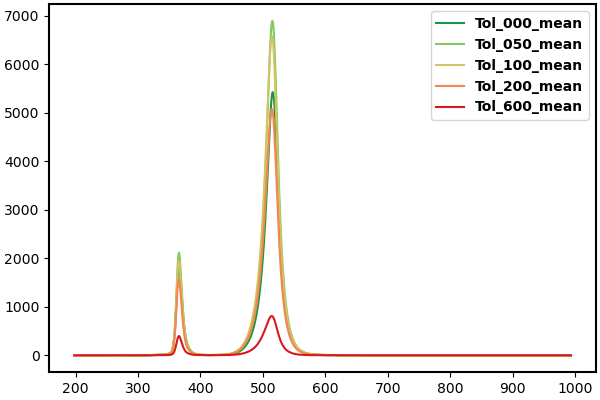

In [15]:
f1, ax1 = plt.subplots(1, 1, figsize = (6, 4), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

label = title
k = len(title)
color_idx = np.linspace(0, 1, k)
# linestyle = ['solid', 'dashed', 'solid', 'dashed', 'solid', 'dashed']
id0 = 8
id1 = 23

for i in range(len(title)):
    # ax1.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=label[i])
    # t = re.findall(r'\d+', title[i])[-1]
    ax1.plot(df[keys_list[i*2]], df[keys_list[i*2+1]], color=cmap(color_idx[i]), label=label[i][:id1])
        
legend_properties = {'weight':'bold', 'size':10}    
ax1.legend(prop=legend_properties)
# ax1[1].legend(prop=legend_properties)

# ax1.set_xlim(-0.5, 20)
# ax1.set_ylim(2500, 9500)
# ax1.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
# ax1.set_ylabel('Intensity', fontsize=16, fontweight='regular')
# ax1.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
spinewidth = 1.5
ax1.spines["bottom"].set_linewidth(spinewidth)
ax1.spines["right"].set_linewidth(spinewidth)
ax1.spines["top"].set_linewidth(spinewidth)
ax1.spines["left"].set_linewidth(spinewidth)

imag_name = '20221228_ZnI2_tth_01.png'
# cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221127_Cl_Br_I'
# plt.savefig(cwd + '/' + imag_name, dpi = 600,  transparent=True)


### Define integrate range ###
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

wavelength_range = [390, 750]
idx_w0, w0 = find_nearest(df[keys_list[0]], wavelength_range[0])
idx_w1, w1 = find_nearest(df[keys_list[0]], wavelength_range[1])

# ax1.axvline(w0)
# ax1.axvline(w1)

## Create new folder "plqy" for saving data

In [16]:
new_dir = cwd + '/plqy'

try:
    os.mkdir(new_dir)
except FileExistsError:
    pass

# if os.path.exists(new_dir):
#     pass
# else:
#     os.mkdir(new_dir)

## Integrate peak area

In [17]:
simpson_int = []
for i in range(len(title)):
    x = df[keys_list[i*2]][idx_w0:idx_w1]
    y = df[keys_list[i*2+1]][idx_w0:idx_w1]
    simpson_int.append(integrate.simpson(y, x))

df_int = pd.DataFrame()
df_int['Data_source'] = [title[i] for i in range(len(title))]
df_int['Simpson_integrate'] = simpson_int
df_int

,Data_source,Simpson_integrate
0,Tol_000_mean,157803.542534
1,Tol_050_mean,201456.696926
2,Tol_100_mean,198365.850491
3,Tol_200_mean,154321.207771
4,Tol_600_mean,26754.899725


## Save Simpson integrate of PL peak

In [18]:
# df_int.to_csv(os.path.join(new_dir, 'Cs_100_Br_100_Tol_simpson_integrate.csv'), index=False, sep=',', float_format='{:.8e}'.format)

In [19]:
# df_int.to_csv('Cs_100_Br_100_Tol_simpson_integrate.txt', index=False, sep=' ', float_format='{:.5e}'.format)

# Absorbance

### Read Abs data into pandas dataframe

In [20]:
# df_x = pd.DataFrame()
# df_int = pd.DataFrame()
df2 = pd.DataFrame()
# integration_time = ['200ms', '300ms', '400ms', '2000ms', '3000ms', '4000ms']
# integration_time = ['20ms']

for i in range(len(subfolder)):
    for j in range(len(dilute_list)):
        # data_files = subfolder
        data_files = glob.glob(subfolder[i] + f'/**Tol_Absorbance**')
        data_files.sort()
        # del data_files[0]
        # suffix = os.path.basename(subfolder_PL[i])
        suffix = dilute_list[i][-7:]
        # id0 = 8
        # id1 = 22

        skiprows = 14 ## skip 23 rows if data processed by dioptas or ## 8
        df_int = pd.DataFrame()
        df_temp = pd.DataFrame()

        for k in range(len(data_files)):        
            df_int = pd.read_csv(data_files[k], skiprows=skiprows, sep='\t', names=['Wavelength', f'Abs_{k:03d}'])
            df_temp = pd.concat([df_temp, df_int[f'Abs_{k:03d}']], axis=1, ignore_index=False)
        
        # df_temp[f'{suffix}_mean'] = df_temp.mean(axis=1)
        # df_temp = pd.read_csv(data_files[i], skiprows=skiprows, sep=',')
        df2[f'x_{suffix}'] = df_int['Wavelength']
        df2[f'{suffix}_mean'] = df_temp.mean(axis=1)


## Export Absorbance of dilute CsPbBr3 for PLQY_summary_02.ipynb

In [21]:
# df_66 = pd.DataFrame()

# df_66['Wavelength_01'] = df['x_2E-4M_200ms']
# df_66['quinine_0.2mM_PL'] = df['2E-4M_200ms_mean']
# df_66['Wavelength_02'] = df2['x_2E-4M_200ms']
# df_66['quinine_0.2mM_Abs'] = df2['2E-4M_200ms_mean']

# df2.to_csv('20230829_CsPbBr_abs.txt', index=False, sep=' ', float_format='{:.5e}'.format)

In [22]:
df2

,x_Tol_000,Tol_000_mean,x_Tol_050,Tol_050_mean,x_Tol_100,Tol_100_mean,x_Tol_200,Tol_200_mean,x_Tol_600,Tol_600_mean
0,197.742,0.017778,197.742,0.016667,197.742,0.004444,197.742,0.014444,197.742,0.012222
1,198.544,0.031111,198.544,0.026667,198.544,0.024444,198.544,0.014444,198.544,0.012222
2,199.347,0.030000,199.347,0.026667,199.347,0.021111,199.347,0.014444,199.347,0.010000
3,200.149,0.030000,200.149,0.026667,200.149,0.021111,200.149,0.016667,200.149,0.010000
4,200.951,0.030000,200.951,0.027778,200.951,0.020000,200.951,0.017778,200.951,0.010000
...,...,...,...,...,...,...,...,...,...,...
1039,990.770,-0.004444,990.770,-0.010000,990.770,-0.010000,990.770,-0.010000,990.770,0.000000
1040,991.489,-0.003333,991.489,-0.010000,991.489,-0.010000,991.489,-0.010000,991.489,0.000000
1041,992.208,-0.001111,992.208,-0.010000,992.208,-0.010000,992.208,-0.010000,992.208,0.000000
1042,992.928,-0.001111,992.928,-0.010000,992.928,-0.010000,992.928,-0.005556,992.928,0.000000


## Prepare keys for average scans in pd dataframe

In [23]:
keys_list2 = list(df2.keys())
# k1 = [k for k in keys_list if 'mean' in k]
keys_list2

['x_Tol_000',
 'Tol_000_mean',
 'x_Tol_050',
 'Tol_050_mean',
 'x_Tol_100',
 'Tol_100_mean',
 'x_Tol_200',
 'Tol_200_mean',
 'x_Tol_600',
 'Tol_600_mean']

In [24]:
# title = [os.path.basename(subfolder_Abs[i]) for i in range(len(subfolder_Abs))]
title = keys_list2[1::2]
print(*title, sep='\n')

# label1 = ['quinine_1E-4M', 'quinine_2E-4M', 'quinine_5E-4M']
#          # 'Insitu CsPb 6mM + Br 6 mM + ZnI2 128uL/min']

# label2 = ['200ms', '300ms']
#          # 'ZnI2 128 uL/min']

Tol_000_mean
Tol_050_mean
Tol_100_mean
Tol_200_mean
Tol_600_mean


## Plot all Abs scans together

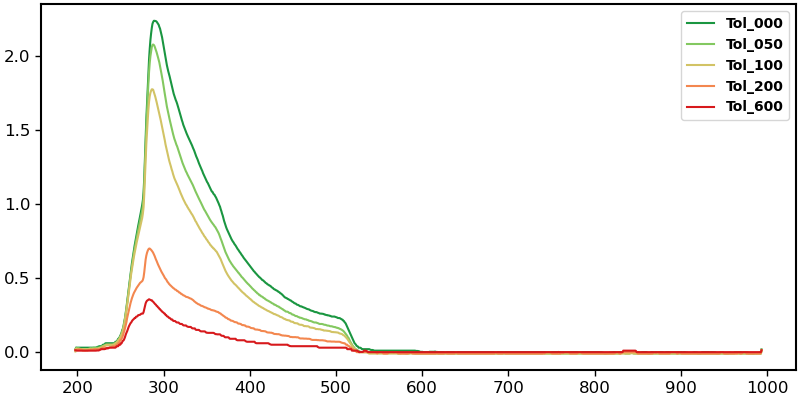

In [25]:
f2, ax2 = plt.subplots(1, 1, figsize = (8, 4), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

label = title
k = len(title)
color_idx = np.linspace(0, 1, k)
# linestyle = ['solid', 'dashed', 'solid', 'dashed', 'solid', 'dashed']
id0 = 8
id1 = -5

for i in range(len(title)):
    # ax2.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=label[i])
    ax2.plot(df2[keys_list2[i*2]], df2[keys_list2[i*2+1]], color=cmap(color_idx[i]), label=label[i][:id1])

legend_properties = {'weight':'bold', 'size':10}    
ax2.legend(prop=legend_properties)

# ax2.set_xlim(-0.5, 20)
# ax2.set_ylim(2500, 9500)
# ax2.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
# ax2.set_ylabel('Intensity', fontsize=16, fontweight='regular')
ax2.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
spinewidth = 1.5
ax2.spines["bottom"].set_linewidth(spinewidth)
ax2.spines["right"].set_linewidth(spinewidth)
ax2.spines["top"].set_linewidth(spinewidth)
ax2.spines["left"].set_linewidth(spinewidth)

imag_name = '20221228_ZnI2_tth_01.png'
# cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221127_Cl_Br_I'
# plt.savefig(cwd + '/' + imag_name, dpi = 600,  transparent=True)

## Try linear fitting

In [26]:
def line_2D(x, slope, y_intercept):
    y = x*slope + y_intercept
    return y


def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

def fit_line_2D(x, y, fit_function, x_range=[500, 900], maxfev=10000, plot=True):
    x = np.asarray(x)
    y = np.asarray(y)
    y = np.nan_to_num(y, nan=0)
    
    try:        
        idx0, _ = find_nearest(x, x_range[0])
        idx1, _ = find_nearest(x, x_range[1])
    except (TypeError, IndexError):
        idx0 = 0
        idx1 = -1
    
    slope = (y[idx1]-y[idx0]) / (x[idx1]-x[idx0])
    y_intercept = np.mean(y[idx0:idx1])
    
    try:
        initial_guess = [slope, y_intercept]
    except (TypeError, IndexError):
        initial_guess = [0.01, 0]
    
    try:
        popt, pcov = curve_fit(fit_function, x[idx0:idx1], y[idx0:idx1], p0=initial_guess, maxfev=maxfev)
    except RuntimeError:
        maxfev=1000000
        popt, pcov = curve_fit(fit_function, x[idx0:idx1], y[idx0:idx1], p0=initial_guess, maxfev=maxfev)
        
    if plot:
        plt.figure()
        plt.plot(x, y, label='data')
        plt.plot(x, fit_function(x, popt[0], popt[1]), label=f'y={popt[0]:.4f}x+{popt[1]:.4f}')
        plt.legend()
    
    return popt, pcov


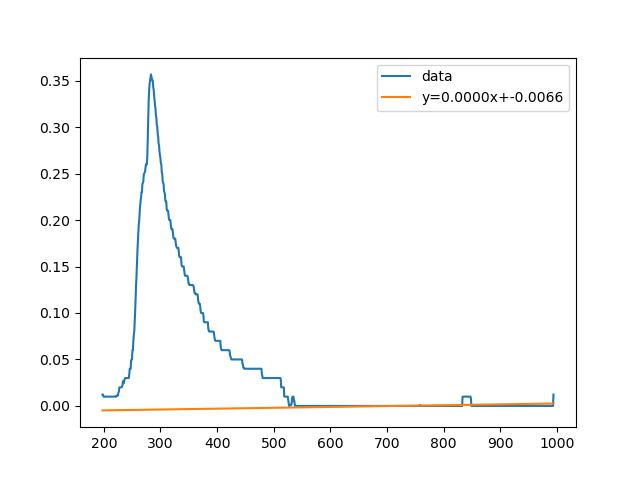

In [27]:
x = df2[keys_list2[-2]]
y = df2[keys_list2[-1]]
x_range=[700, 900]
idx0, v0 = find_nearest(x, x_range[0])
idx1, v1 = find_nearest(x, x_range[1])
popt, pcov = fit_line_2D(x,y,line_2D, x_range=[700, 900])

In [28]:
title.append('dummy')
title

['Tol_000_mean',
 'Tol_050_mean',
 'Tol_100_mean',
 'Tol_200_mean',
 'Tol_600_mean',
 'dummy']

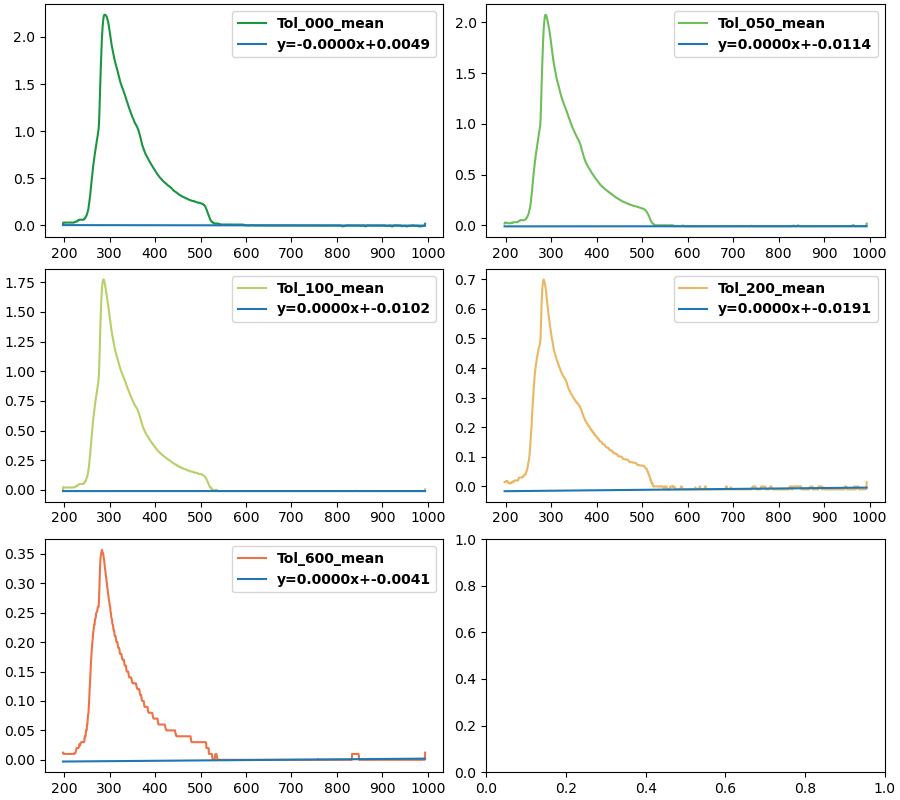

In [29]:
rows = 3
cols = 2
f3, ax3 = plt.subplots(rows, cols, figsize = (9, 8), constrained_layout=True)

label = title
title_reshape = np.asarray(title).reshape(rows, cols)
color_idx = np.linspace(0, 1, len(title))
id0 = 8
id1 = 22
x_range_list = [[600, 900], [600, 900], 
                [600, 900], [600, 900], 
                [400, 900], [800, 900],
               ]

legend_properties = {'weight':'bold', 'size':10}
df4 = pd.DataFrame()
for i in range(len(title)):
    # ax1.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=label[i])
    idx_ax = np.argwhere(title_reshape==title[i])
    try:
        x = df2[keys_list2[i*2]]
        y = df2[keys_list2[i*2+1]]
        popt, pcov = fit_line_2D(x, y, line_2D, x_range=x_range_list[0], plot=False)
        ax3[idx_ax[0][0], idx_ax[0][1]].plot(x, y, color=cmap(color_idx[i]), label=label[i][:id1])
        ax3[idx_ax[0][0], idx_ax[0][1]].plot(x, line_2D(x, popt[0], popt[1]), label=f'y={popt[0]:.4f}x+{popt[1]:.4f}')
        ax3[idx_ax[0][0], idx_ax[0][1]].legend(prop=legend_properties)
        df4[keys_list2[i*2]] = x
        # df4[keys_list2[i*2+1]] = y - popt[1]
        df4[keys_list2[i*2+1]] = y - line_2D(x, *popt)
    
    except (KeyError, IndexError):
        pass

# # ax3.set_xlim(-0.5, 20)
# # ax3.set_ylim(2500, 9500)
# # ax3.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
# # ax3.set_ylabel('Intensity', fontsize=16, fontweight='regular')
# ax3.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
# spinewidth = 1.5
# ax3.spines["bottom"].set_linewidth(spinewidth)
# ax3.spines["right"].set_linewidth(spinewidth)
# ax3.spines["top"].set_linewidth(spinewidth)
# ax3.spines["left"].set_linewidth(spinewidth)

In [30]:
title = keys_list2[1::2]
title

['Tol_000_mean',
 'Tol_050_mean',
 'Tol_100_mean',
 'Tol_200_mean',
 'Tol_600_mean']

## Plot Abs by offset

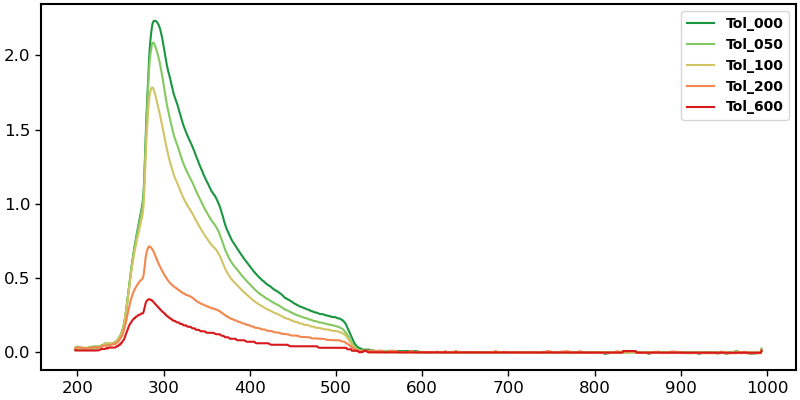

In [31]:
f4, ax4 = plt.subplots(1, 1, figsize = (8, 4), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

label = title
k = len(title)
color_idx = np.linspace(0, 1, k)
# linestyle = ['solid', 'dashed', 'solid', 'dashed', 'solid', 'dashed']
id0 = 8
id1 = -5

for i in range(len(title)):
    # ax4.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=label[i])
    ax4.plot(df4[keys_list2[i*2]], df4[keys_list2[i*2+1]], color=cmap(color_idx[i]), label=label[i][:id1])

legend_properties = {'weight':'bold', 'size':10}    
ax4.legend(prop=legend_properties)

# ax4.set_xlim(-0.5, 20)
# ax4.set_ylim(2500, 9500)
# ax4.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
# ax4.set_ylabel('Intensity', fontsize=16, fontweight='regular')
ax4.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
spinewidth = 1.5
ax4.spines["bottom"].set_linewidth(spinewidth)
ax4.spines["right"].set_linewidth(spinewidth)
ax4.spines["top"].set_linewidth(spinewidth)
ax4.spines["left"].set_linewidth(spinewidth)

imag_name = '20221228_ZnI2_tth_01.png'
# cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221127_Cl_Br_I'
# plt.savefig(cwd + '/' + imag_name, dpi = 600,  transparent=True)

## Prepare keys for offset data in pd dataframe

In [32]:
keys_list4 = list(df4.keys())
# k1 = [k for k in keys_list if 'mean' in k]
keys_list4

['x_Tol_000',
 'Tol_000_mean',
 'x_Tol_050',
 'Tol_050_mean',
 'x_Tol_100',
 'Tol_100_mean',
 'x_Tol_200',
 'Tol_200_mean',
 'x_Tol_600',
 'Tol_600_mean']

## Save offset data as csv

In [33]:
for i in range(len(title)):
    df_temp = pd.DataFrame()
    df_temp['Wavelength'] = df4[keys_list4[i*2]].fillna(0)
    df_temp['Absorbance'] = df4[keys_list4[i*2+1]].fillna(0)
    fn = title[i][:id1] + '_offset.csv'
    print(fn)
    # df_temp.to_csv(os.path.join(new_dir, fn), index=False, sep=',', float_format='{:.8e}'.format)

Tol_000_offset.csv
Tol_050_offset.csv
Tol_100_offset.csv
Tol_200_offset.csv
Tol_600_offset.csv


## Save Absorbance at 365 nm

In [34]:
idx_365, w365 = find_nearest(df4[keys_list2[0]], 365)
# df4.iloc[idx_365][::-2][::-1].to_list()

df_365 = pd.DataFrame()
df_365['Data_source'] = [title[i] for i in range(len(title))]
df_365['Abs_365'] = df2.iloc[idx_365][1::2].to_list()
df_365['Abs_offset_365'] = df4.iloc[idx_365][1::2].to_list()
df_365

,Data_source,Abs_365,Abs_offset_365
0,Tol_000_mean,0.991111,0.988797
1,Tol_050_mean,0.791111,0.801745
2,Tol_100_mean,0.644444,0.654548
3,Tol_200_mean,0.263333,0.276905
4,Tol_600_mean,0.120000,0.121871


In [35]:
# df_365.to_csv(os.path.join(new_dir, 'Cs_100_Br_050_Tol_abs_365.csv'), index=False, sep=',', float_format='{:.8e}'.format)

In [36]:
# df_365.to_csv('Cs_100_Br_050_Tol_abs_365.txt', index=False, sep=' ', float_format='{:.5e}'.format)

In [37]:
df2.keys()

Index(['x_Tol_000', 'Tol_000_mean', 'x_Tol_050', 'Tol_050_mean', 'x_Tol_100',
       'Tol_100_mean', 'x_Tol_200', 'Tol_200_mean', 'x_Tol_600',
       'Tol_600_mean'],
      dtype='object')

## Import analysis functions

In [38]:
%run -i /Users/chenghunglin/Documents/Git_BNL/profile_collection_ldrd20-31/scripts/_data_analysis.py

## Gaussian peak fittimg

In [39]:
keys_list.append('x_dummy')
keys_list.append('dummy')
keys_list

['x_Tol_000',
 'Tol_000_mean',
 'x_Tol_050',
 'Tol_050_mean',
 'x_Tol_100',
 'Tol_100_mean',
 'x_Tol_200',
 'Tol_200_mean',
 'x_Tol_600',
 'Tol_600_mean',
 'x_dummy',
 'dummy']

x_Tol_000 passes c1 so is good.

** Average of Tol_000_mean has peaks at [149]**


** start to do peak fitting by Gaussian**

x_Tol_050 passes c1 so is good.

** Average of Tol_050_mean has peaks at [148]**


** start to do peak fitting by Gaussian**

x_Tol_100 passes c1 so is good.

** Average of Tol_100_mean has peaks at [147]**


** start to do peak fitting by Gaussian**

x_Tol_200 passes c1 so is good.

** Average of Tol_200_mean has peaks at [147]**


** start to do peak fitting by Gaussian**

x_Tol_600 passes c1 so is good.

** Average of Tol_600_mean has peaks at [146]**


** start to do peak fitting by Gaussian**



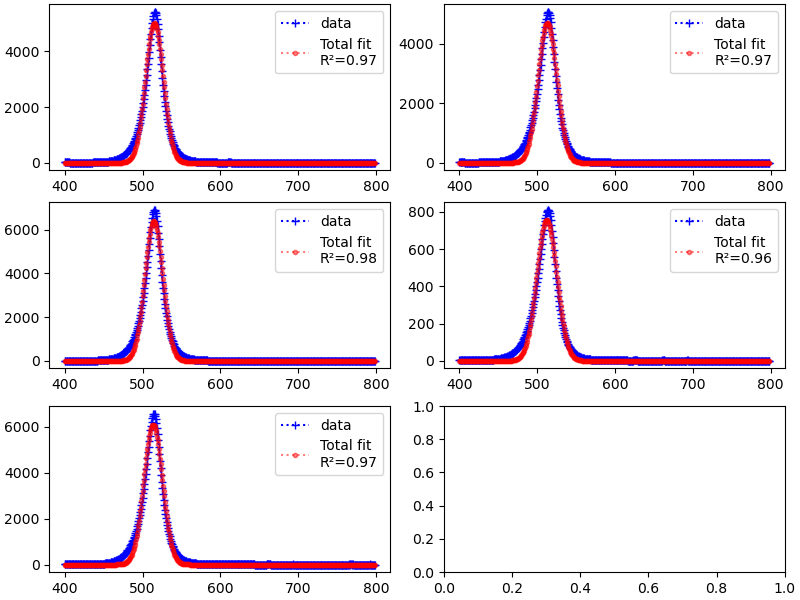

In [40]:
rows = 3
cols = 2
f5, ax5 = plt.subplots(rows, cols, figsize = (8, 6), constrained_layout=True)
# ax4 = ax4.flatten()
wl1 = 400
wl2 = 800
idx1, w1 = find_nearest(df[keys_list[0]], wl1)
idx2, w2 = find_nearest(df[keys_list[0]], wl2)

key_x_reshape = np.asarray(keys_list[0::2]).reshape(cols, rows).T
key_y_reshape = np.asarray(keys_list[1::2]).reshape(cols, rows).T

peak_list = []
fwhm = []
simpson_int = []

for i in range(cols):
    for j in range(rows):
        #i = 4
        try:
            x0 = df[key_x_reshape[j][i]][idx1:idx2].to_numpy()
            y0 = df[key_y_reshape[j][i]][idx1:idx2].to_numpy()
            #_2peak_fit_PL(x,y, distr='G', height=1000, second_peak=-4, plot=True, plot_title=os.path.basename(subfolder[i]))

            peak, prop = good_bad_data(x0, y0, key_height=50, data_id = f'{key_x_reshape[j][i]}', distance=20, height=50)
            x, y, p, f, popt = _fitting_in_kafka(x0, y0, f'{key_y_reshape[j][i]}', peak, prop)  


            simpson_int.append(integrate.simpson(y,x))
            peak_list.append(popt[1])
            fwhm.append(2.355*popt[2])


            fitted_result = f(x, *popt)
            r_2 = r_square(x, y, fitted_result)
            r2 = f'R\u00b2={r_2:.2f}'
            ax5[j][i].set_title(key_y_reshape[j][i][14:27])
            ax5[j][i].plot(x,y,'b+:',label='data')
            ax5[j][i].plot(x,fitted_result,'ro:',label='Total fit\n'+r2, alpha=0.5, markersize=3)

        #     # peak 1
        #     peak_1 = _1gauss(x, *popt[0:3])
        #     ax4[i].plot(x, peak_1, "g", label='peak 1')
        #     ax4[i].fill_between(x, peak_1.min(), peak_1, facecolor="green", alpha=0.5)

        #     # peak 2
        #     peak_2 = _1gauss(x, *popt[3:6])
        #     ax4[i].plot(x, peak_2, "y", label='peak 2')
        #     ax4[i].fill_between(x, peak_2.min(), peak_2, facecolor="yellow", alpha=0.5)

            ax5[j][i].legend()
        
        except (KeyError, IndexError):
            pass

In [41]:
simpson_int

[157715.5689675343,
 201347.07052830883,
 198270.54374337653,
 154258.9697984405,
 26717.753895031]

## Plot PE, FWHM, PLQY

In [42]:
def plqy_quinine(absorbance_sample, PL_integral_sample, refractive_index_solvent, 
                     absorbance_reference, PL_integral_reference, refractive_index_reference, plqy_reference):
    
    integral_ratio = PL_integral_sample / PL_integral_reference
    absorbance_ratio = absorbance_reference / absorbance_sample
    refractive_index_ratio = (refractive_index_solvent / refractive_index_reference)**2

    plqy = plqy_reference * integral_ratio * absorbance_ratio * refractive_index_ratio
    return plqy

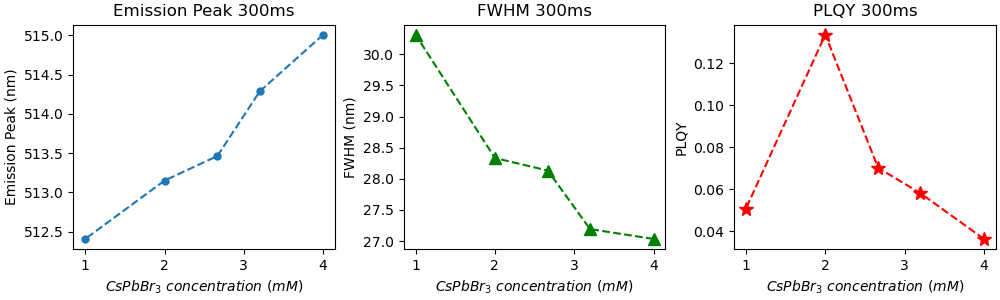

In [47]:
# abs_365 = df11.iloc[210][1::2].to_numpy()
abs_365 = df_365['Abs_365']

abs_365_r = 0.186  ##  20230901_quinine.ipynb: 2E-4M_300ms_mean
plqy_r = 0.546
ref_idx_toluene = 1.506
ref_idx_H2SO4 = 1.337
integral_r = 5.653585e+05  ##  20230901_quinine.ipynb: 2E-4M_300ms_mean
integral_pqds = np.asarray(simpson_int)

plqy = plqy_quinine(abs_365, integral_pqds, 1.506, abs_365_r, integral_r, 1.337, 0.546)
# plqy_4000ms = plqy_quinine(abs_365, integral_pqds[1::2], 1.506, abs_365_r, integral_r[1], 1.337, 0.546)
    

# dilute_constant = np.asarray([1,8,16,24])
dilute_constant = np.asarray(dilute_ratio)
x_list = 4 * dilute_constant
# x_list_T = np.asarray(x_list).reshape(cols, rows).T
# peak_list_T = np.asarray(peak_list).reshape(cols, rows).T
# fwhm_T = np.asarray(fwhm).reshape(cols, rows).T
# plqy_T = np.asarray(plqy).reshape(cols, rows).T

rows = 1
cols = 3
integration_time = ['300ms']

f5, ax5 = plt.subplots(rows, cols, figsize = (10, 3), constrained_layout=True)
# for i in range(rows):
ax5[0].set_title(f'Emission Peak {integration_time[0]}')
ax5[0].set_xlabel(r'$CsPbBr_3\ concentration\ (mM)$', fontdict={'size': 10})
ax5[0].set_ylabel('Emission Peak (nm)')
ax5[1].set_title(f'FWHM {integration_time[0]}')
ax5[1].set_xlabel(r'$CsPbBr_3\ concentration\ (mM)$', fontdict={'size': 10})
ax5[1].set_ylabel('FWHM (nm)')
ax5[2].set_title(f'PLQY {integration_time[0]}')
ax5[2].set_xlabel(r'$CsPbBr_3\ concentration\ (mM)$', fontdict={'size': 10})
ax5[2].set_ylabel('PLQY')


ax5[0].plot(x_list, peak_list, '.--', markersize=10)
ax5[1].plot(x_list, fwhm, 'g^--', markersize=8)
ax5[2].plot(x_list, plqy, 'r*--', markersize=10)

In [48]:
plqy

0    0.036268
1    0.058006
2    0.070120
3    0.133510
4    0.050744
Name: Abs_365, dtype: float64